# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.

The company requires us to build a model where we can identify the Hot Leads (most probable to be converted) and Cold Lead (least likely to be converted). The CEO is expecting the ballpark to be around 80%

In [1]:
## Importing required libraries

import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics

## Data Loading

In [2]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_df.shape

(9240, 37)

## Data Understanding

In [4]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
## Checking null percentage for each column

(lead_df.isnull().sum()/lead_df.index.size)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Step 1 : Data Cleaning & Preparation

In [7]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Let us analyze the data for a few columns to further analyze the data and cleaning relevant data

In [8]:
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [9]:
lead_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [10]:
lead_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### While understanding the data, the value Select is looking more like the dropdown default value, therefore we can treat it as null or nan

In [11]:
lead_df = lead_df.replace('Select', np.nan)

In [12]:
## Checking null percentage for each column again

((lead_df.isnull().sum()/lead_df.index.size)*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [13]:
## Few columns are having more than 30% null values, hence we can go ahead and drop these columns

drop_cols = list(lead_df.columns[((lead_df.isnull().sum()/lead_df.index.size)*100) >= 40])
drop_cols

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [14]:
## Keeping a copy of the original data to keep as a backup and doing Data Cleaning on the new dataset

new_leads = lead_df.copy()
new_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
new_leads.drop(drop_cols, inplace=True, axis=1)
new_leads.shape

(9240, 30)

In [16]:
## Let us check the null values percentage again

((new_leads.isnull().sum()/new_leads.index.size)*100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### The above data is not completely cleaned.
- We need to check the data and do further cleaning for the columns having more than 30% Nan data
- We also have columns with around 2% null values, so we can drop those rows from the dataset

In [17]:
## Dropping data rows which are having 1% - 2% null data

new_leads = new_leads[~pd.isnull(new_leads.TotalVisits)]
new_leads.shape

(9103, 30)

In [18]:
## Let us check the null values again

((new_leads.isnull().sum()/new_leads.index.size)*100).sort_values(ascending=False)

City                                             39.547402
Tags                                             36.614303
Specialization                                   36.295727
What matters most to you in choosing a course    29.682522
What is your current occupation                  29.473800
Country                                          25.530045
Lead Source                                       0.318576
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Prospect ID                                       0.000000
Receive More Updates About Our Courses            0.000000
X Education Forums                                0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Newspaper                                         0.0000

After dropping the values for Total visits feature, the other features having fewer nan values are also cleaned. Let's clean the remaining few values for Lead Source. 

In [19]:
new_leads = new_leads[~pd.isnull(new_leads['Lead Source'])]
new_leads.shape

(9074, 30)

In [20]:
## Checking unique values for feature 'City'

print(new_leads.City.value_counts())
print('\nNull value count ' , new_leads.City.isnull().sum())

Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

Null value count  3575


In [21]:
## Checking unique values for feature 'Tags'

print(new_leads.Tags.value_counts())
print('\nNull value count ' , new_leads.Tags.isnull().sum())

Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [22]:
print(new_leads.Country.isnull().sum())

2296


In [23]:
## Since the null value count is huge in number, we should not impute any irrelevant value and drop these columns

new_leads.drop(['City', 'Tags', 'Country'], inplace = True, axis = 1)
new_leads.shape

(9074, 27)

In [24]:
## Checking null values per feature

print(new_leads.Specialization.isnull().sum())
print(new_leads['What is your current occupation'].isnull().sum())
print(new_leads['What matters most to you in choosing a course'].isnull().sum())

3282
2683
2702


In [25]:
## Since the null count is around 20% - 40% of data, imputing just any value can make a difference on the analysis. 
## We will therefore impute 'Not Provided'

new_leads.Specialization = new_leads.Specialization.fillna('Not Provided')
new_leads['What is your current occupation'] = new_leads['What is your current occupation'].fillna('Not Provided')
new_leads['What matters most to you in choosing a course'] = new_leads['What matters most to you in choosing a course'].fillna('Not Provided')

In [26]:
## Let us check the null values again

((new_leads.isnull().sum()/new_leads.index.size)*100).sort_values(ascending=False)

Prospect ID                                      0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
What is your current occupation                  0.0
Specialization                                   0.0
Last Activity                                    0.0
Page Views Per Visit                          

In [27]:
new_leads.shape

(9074, 27)

In [28]:
## Let us check value counts for each feature in our dataframe

for column in new_leads :
    print(new_leads[column].astype('category').value_counts())
    print('\n************************************************\n')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64

************************************************

579533    1
630088    1
630039    1
630041    1
630042    1
         ..
602403    1
602402    1
602392    1
602388    1
660737    1
Name: Lead Number, Length: 9074, dtype: int64

************************************************

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

************************************************

G

From the above details on each feature and it's unique values, we have clearly observed that there is data imbalance in our dataset. Therfore, we will drop all these features.

In [29]:
new_leads.drop(['Do Not Email', 'Do Not Call', 'What matters most to you in choosing a course', 
                       'Magazine', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
                       'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
                       'Update me on Supply Chain Content', 'Get updates on DM Content', 
                       'I agree to pay the amount through cheque'], inplace=True, axis=1)
new_leads.shape

(9074, 13)

#### We have now completed the Data cleaning activity and also handled Data Imbalance. Now we can go ahead and preform some Data Visualization, i.e, EDA

## Data Vizualization

In [30]:
## Let's view the data info once again

new_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

### Visualizing for all Categoric features

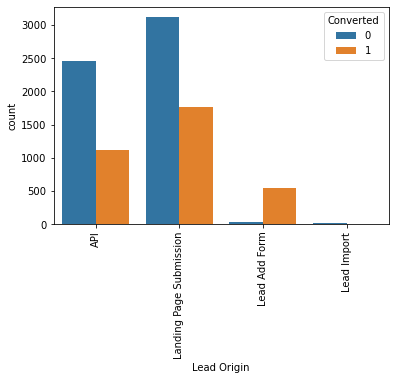

In [31]:
sns.countplot(new_leads['Lead Origin'], hue=new_leads['Converted'])
plt.xticks(rotation = 90)
plt.show()

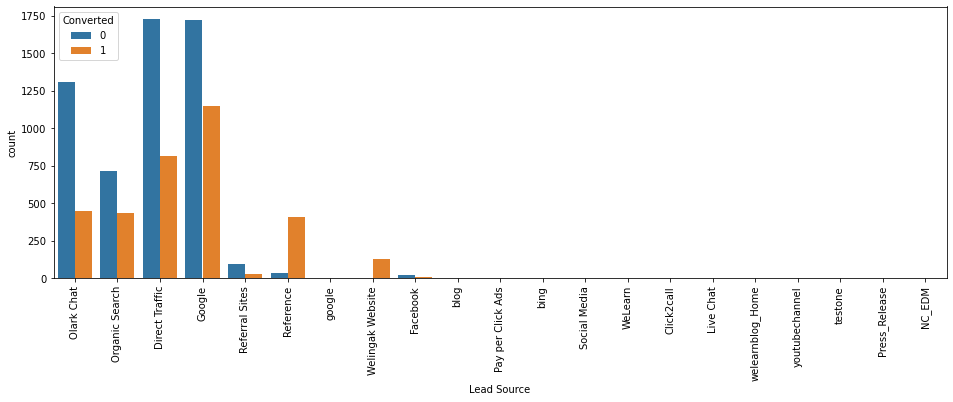

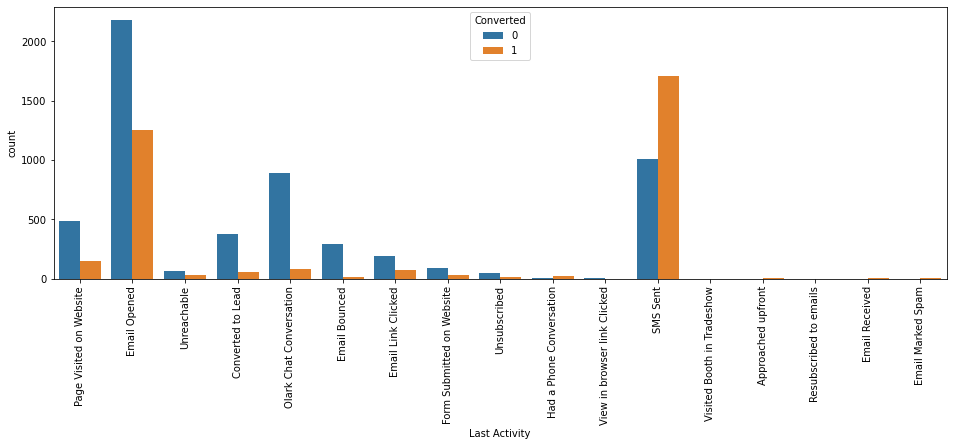

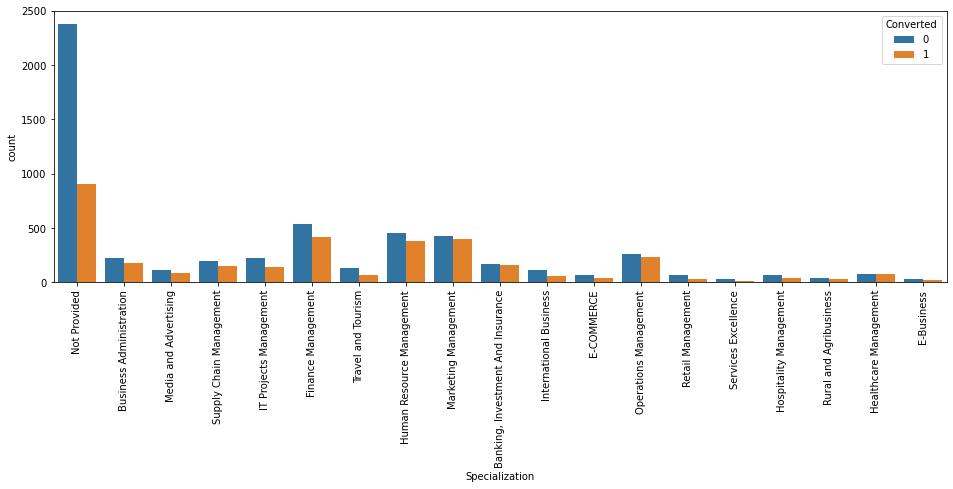

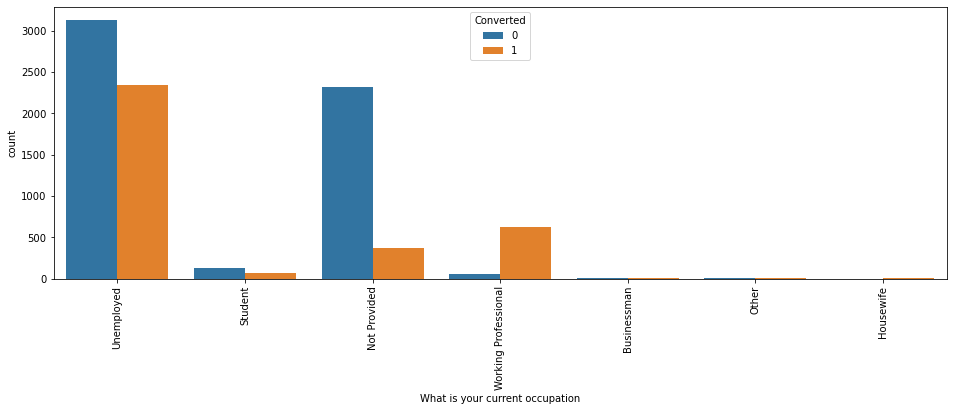

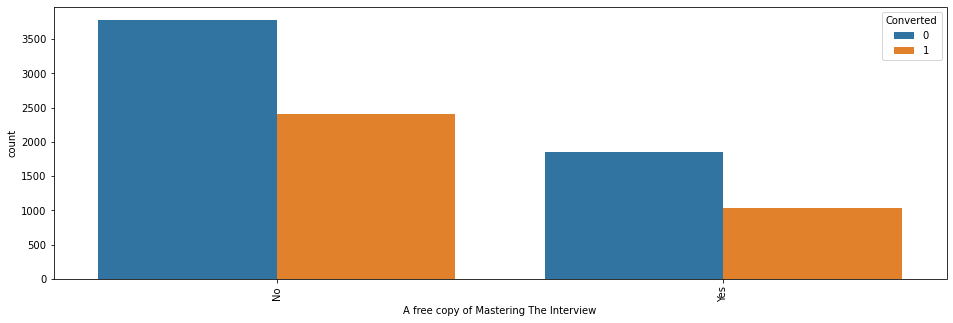

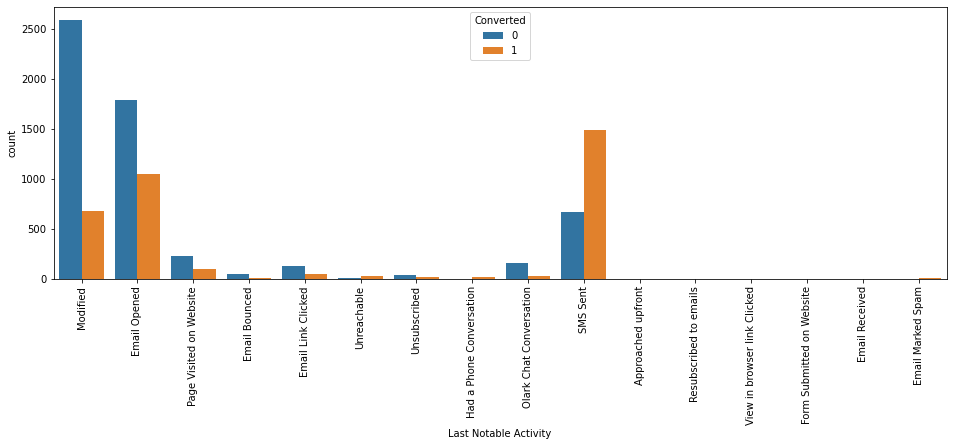

In [32]:
## Categorical Analysis for all features

columns = ['Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 
        'A free copy of Mastering The Interview', 'Last Notable Activity']

for col in columns :    
    plt.figure(figsize= (16, 5))
    sns.countplot(new_leads[col], hue=new_leads['Converted'])
    plt.xticks(rotation = 90)    
    plt.show()

#### From the above analysis, we can observe a few points :

- Lead Add Forms is the highest Lead converter amoung all Lead Origins
- Welingak Website and References, followed by Google are highest Lead Converters from Lead Sources
- People whose Last activity is either Email Opened or SMS sent are possible Lead Converters
- Most Positive Leads are from Finance Management, HR or Marketing and even few who have not provided their Specilization
- Working Professionals followed by Unemployed are the highest Lead converters
- Enthusiasts with Last Notable Activity as SMS sent are also Lead Converters

### Numerical features vizualization

In [33]:
new_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

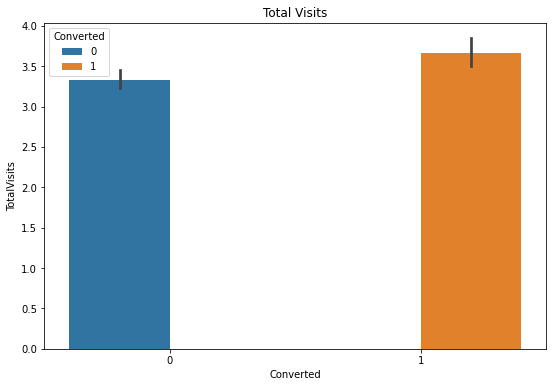

In [34]:
plt.figure(figsize = (9,6))
sns.barplot(data = new_leads, x = new_leads.Converted, y = new_leads.TotalVisits, hue = new_leads.Converted)
plt.title('Total Visits')
plt.show()

- Total visits for both Converted and Not Converted are similar but it can result in increasing the prominent leads

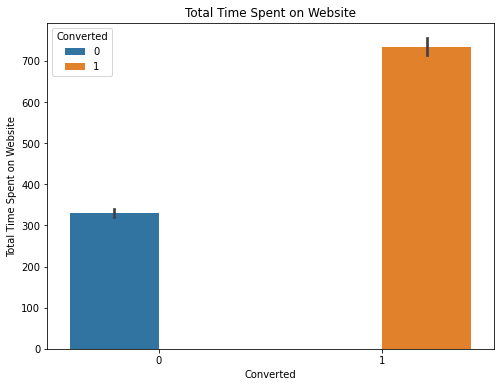

In [35]:
plt.figure(figsize = (8,6))
sns.barplot(data = new_leads, x = new_leads.Converted, y = new_leads['Total Time Spent on Website'], hue = new_leads.Converted)
plt.title('Total Time Spent on Website')
plt.show()

- More is the time spent by leads, more leads can be positively converted

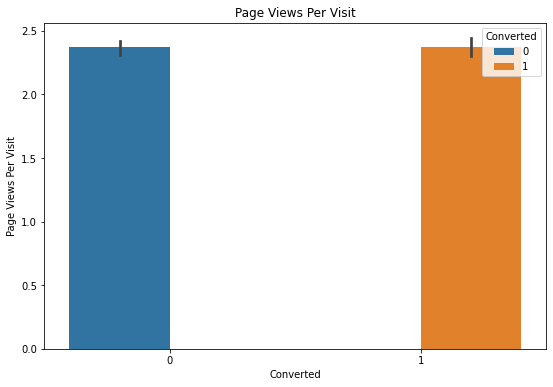

In [36]:
plt.figure(figsize = (9,6))
sns.barplot(data = new_leads, x = new_leads.Converted, y = new_leads['Page Views Per Visit'], hue = new_leads.Converted)
plt.title('Page Views Per Visit')
plt.show()

- Similar to Total Visits, the above plot for Page Views Per Visit are also not reliable for any interpretation or observation

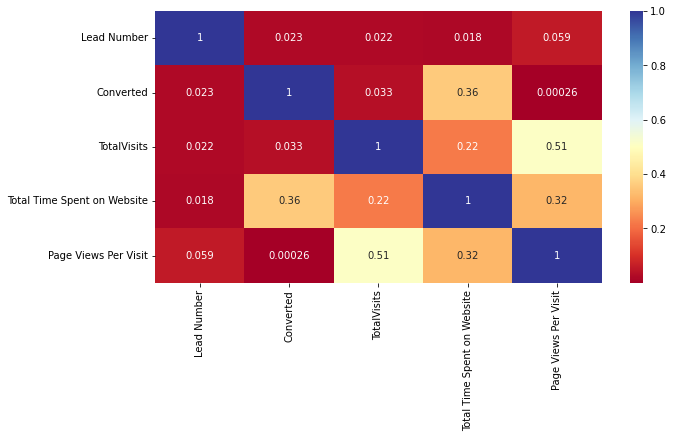

In [37]:
# To check the correlation among all varibles
plt.figure(figsize=(10,5))
sns.heatmap(new_leads.corr(), annot = True, cmap='RdYlBu')
plt.show()

- The above heatmap shows the correlation amoung features and the features are understandably not highly correlated 

In [38]:
## Let us view the data again

new_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,No,Modified


In [39]:
## After observing the data again, the Prospect ID and the Lead Number are also not necessary for our analysis
## so we can go ahead and drop these as well

In [40]:
new_leads.drop(['Prospect ID', 'Lead Number'], inplace=True, axis=1)
new_leads.shape

(9074, 11)

In [41]:
## For further analysis, let us create Dummy variables

### Creating dummy variables

In [42]:
## We need to check again which columns are categorical 

new_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Converted                               9074 non-null   int64  
 3   TotalVisits                             9074 non-null   float64
 4   Total Time Spent on Website             9074 non-null   int64  
 5   Page Views Per Visit                    9074 non-null   float64
 6   Last Activity                           9074 non-null   object 
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   object 
 10  Last Notable Activity                   9074 non-null   obje

In [43]:
cat_cols = list(new_leads.loc[:, new_leads.dtypes == 'object'].columns)
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [44]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(new_leads[cat_cols], drop_first = True)

# Add dummies to new dataframe
new_leads = pd.concat([new_leads, dummy], axis=1)
new_leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,No,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,No,...,0,0,1,0,0,0,0,0,0,0


In [45]:
## Since the dummy variables have been created, we can drop the original features
## Checking Original dataset shape

new_leads.drop(cat_cols, inplace=True, axis=1)
new_leads.shape

(9074, 83)

In [46]:
## Let us analyze all features after dummy creation

new_leads.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Rec

In [47]:
## As we can observe, we have dummy features which were of default 'Select' value hence these can be dropped

new_leads.drop(['What is your current occupation_Not Provided', 'Specialization_Not Provided'], axis=1, inplace=True)
new_leads.shape

(9074, 81)

## Splitting the Data into Training and Testing Data Sets

In [48]:
## Initializing all variables to X except of the target variable

X = new_leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
## Initializing the target variable

y = new_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
## Split the dataset into train and test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### Scaling

In [51]:
## We need to scale our numeric features

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
# Looking at the correlation table since the number of features is very high and plotting it will not make much sense

new_leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.032855,0.359261,0.000260,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029960,...,-0.008194,0.044577,-0.263532,-0.071564,-0.033830,0.013451,0.360233,0.037893,-0.016286,-0.008194
TotalVisits,0.032855,1.000000,0.219723,0.511068,0.290347,-0.169742,-0.037808,0.095571,-0.036983,0.106848,...,-0.003146,0.022317,-0.107875,-0.037993,0.227450,-0.007468,-0.001620,0.005513,0.003061,0.009819
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350,0.292571,-0.188526,-0.050742,0.140793,-0.050248,0.215390,...,-0.003772,0.022925,-0.127020,-0.050877,0.028713,-0.009298,0.137169,0.009594,0.003951,-0.007584
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000,0.484119,-0.268415,-0.056068,0.133118,-0.053735,0.204870,...,-0.001798,0.013928,-0.096466,-0.088593,0.026102,-0.011516,0.059445,0.019415,0.021668,0.001457
Lead Origin_Landing Page Submission,-0.037481,0.290347,0.292571,0.484119,1.000000,-0.282445,-0.062195,0.523695,-0.059438,0.078455,...,0.009722,0.002608,-0.084643,-0.118758,0.043041,-0.011337,0.052736,-0.000847,0.018171,-0.011337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,0.013451,-0.007468,-0.009298,-0.011516,-0.011337,-0.002746,-0.000605,-0.006551,-0.000615,-0.007137,...,-0.000110,-0.000413,-0.007875,-0.001506,-0.002001,1.000000,-0.005854,-0.000625,-0.000741,-0.000110
Last Notable Activity_SMS Sent,0.360233,-0.001620,0.137169,0.059445,0.052736,0.115585,-0.027600,0.016095,-0.023765,-0.001771,...,-0.005854,-0.021918,-0.418219,-0.079994,-0.106259,-0.005854,1.000000,-0.033170,-0.039363,-0.005854
Last Notable Activity_Unreachable,0.037893,0.005513,0.009594,0.019415,-0.000847,0.007222,-0.003426,-0.016425,-0.003483,0.011539,...,-0.000625,-0.002339,-0.044621,-0.008535,-0.011337,-0.000625,-0.033170,1.000000,-0.004200,-0.000625
Last Notable Activity_Unsubscribed,-0.016286,0.003061,0.003951,0.021668,0.018171,-0.018465,-0.004066,0.004851,-0.004133,-0.000753,...,-0.000741,-0.002775,-0.052952,-0.010128,-0.013454,-0.000741,-0.039363,-0.004200,1.000000,-0.000741


## Step 2 : Model Building

As we can observe clearly, there are more than 80 columns which is a large number. Hence use RFE and analyse only the required selected features

In [53]:
## Creating Linear Regression object 

logistic_reg = LinearRegression()

In [54]:
rfe_obj = RFE(logistic_reg, 20)

In [55]:
rfe_obj = rfe_obj.fit(X_train, y_train)

In [56]:
## Let us observe the features selected by RFE

list(zip(X_train.columns, rfe_obj.support_, rfe_obj.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', False, 44),
 ('Lead Origin_Lead Add Form', False, 39),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', True, 1),
 ('Lead Source_Press_Release', True, 1),
 ('Lead Source_Reference', False, 38),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 61),
 ('Lead Source_Welingak Website', False, 22),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', True, 1),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', True, 1),
 ('Lead Source_welearnblog_Home', True, 1),
 ('Lead Source_youtubec

In [57]:
## Keeping all the selected features by RFE as cols

cols = X_train.columns[rfe_obj.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [58]:
## Selecting features selected by RFE for X_train

X_train_RFE = X_train[cols]

In [59]:
# Adding a constant and Fitting a logistic Regression model on X_train to output the summary

X_train_sm = sm.add_constant(X_train_RFE)
model_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res_sum = model_1.fit()
res_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3028.6
Date:                Sun, 01 Jan 2023   Deviance:                       6057.3
Time:                        13:02:55   Pearson chi2:                 6.75e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2690      0.198     11.446      0.000       1.880       2.658
TotalVisits                                              7.0519      2.219      3.178      0.001       2.703      11.400
Total Time Spent on Website                              4.6730      0.154     30.296      0.000       4.371       4.975
Lead Origin_Lead Import                                 23.7588   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -4.7679      0.217    -21.987      0.000      -5.193      -4.343
Lead Source_Facebook                                   -26.7620   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -4.3542      0.214    -20.340      0.000      -4.774      -3.935
Lead Source_Olark Chat                                  -3.5502      0.210    -16.875      0.000      -3.963      -3.138
Lead Source_Organic Search                              -4.5933      0.228    -20.107      0.000      -5.041      -4.146
Lead Source_Pay per Click Ads                          -26.1818   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -28.8005   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Referral Sites                              -5.1904      0.386    -13.458      0.000      -5.946      -4.435
Lead Source_Social Media                                -3.5001      1.543     -2.268      0.023      -6.524      -0.476
Lead Source_bing                                        -3.6828      1.248     -2.950      0.003      -6.130      -1.236
Lead Source_blog                                       -27.3687   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -27.4554    3.6e+04     -0.001      0.999   -7.05e+04    7.05e+04
Lead Source_testone                                    -26.6137   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_welearnblog_Home                           -26.6638   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_youtubechannel                             -26.9698   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
What is your current occupation_Housewife               23.7355    2.5e+04      0.001      0.999   -4.89e+04     4.9e+04
What is your current occupation_Working Professional     2.8091      0.178     15.813      0.000       2.461       3.157
========================================================================================================================
"""

There are multiple features where the p-value is more than 0.05, which needs to be treated. Before that, let us also observe the VIF for each of these features

In [60]:
## Method to calculate the VIF

def calculate_VIF(df) :
    df_VIF = pd.DataFrame()
    df_VIF['Features'] = df.columns
    df_VIF['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1]) ]
    df_VIF['VIF'] = round(df_VIF['VIF'], 2)
    df_VIF = df_VIF.sort_values(by = 'VIF', ascending=False)
    return df_VIF

In [61]:
calculate_VIF(X_train_sm)

,Features,VIF
5,Lead Source_Facebook,24.97
3,Lead Origin_Lead Import,24.91
0,const,15.73
6,Lead Source_Google,4.49
4,Lead Source_Direct Traffic,4.20
7,Lead Source_Olark Chat,3.17
8,Lead Source_Organic Search,2.88
2,Total Time Spent on Website,1.29
11,Lead Source_Referral Sites,1.23
1,TotalVisits,1.17


The VIF is higher for 'Lead Source_Facebook' and 'Lead Origin_Lead Import' and also have high p-value hence let s drop both of them

In [62]:
X_train_RFE.drop(['Lead Source_Facebook', 'Lead Origin_Lead Import'], axis=1, inplace=True)

In [63]:
# Refit the model with the new set of features

model_2 = sm.GLM(y_train,(sm.add_constant(X_train_RFE)), family = sm.families.Binomial())
model_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3051.2
Date:                Sun, 01 Jan 2023   Deviance:                       6102.3
Time:                        13:02:56   Pearson chi2:                 6.55e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8416      0.162     11.374      0.000       1.524       2.159
TotalVisits                                              6.9122      2.204      3.136      0.002       2.593      11.232
Total Time Spent on Website                              4.6707      0.154     30.298      0.000       4.369       4.973
Lead Source_Direct Traffic                              -4.3377      0.184    -23.560      0.000      -4.699      -3.977
Lead Source_Google                                      -3.9238      0.181    -21.700      0.000      -4.278      -3.569
Lead Source_Olark Chat                                  -3.1227      0.177    -17.686      0.000      -3.469      -2.777
Lead Source_Organic Search                              -4.1620      0.198    -21.067      0.000      -4.549      -3.775
Lead Source_Pay per Click Ads                          -25.7526   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -28.3652   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Referral Sites                              -4.7580      0.368    -12.925      0.000      -5.480      -4.037
Lead Source_Social Media                                -3.0708      1.539     -1.996      0.046      -6.087      -0.055
Lead Source_bing                                        -3.2535      1.243     -2.617      0.009      -5.690      -0.817
Lead Source_blog                                       -26.9384   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -27.0237    3.6e+04     -0.001      0.999   -7.05e+04    7.05e+04
Lead Source_testone                                    -26.1833   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_welearnblog_Home                           -26.2349   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_youtubechannel                             -26.5397   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
What is your current occupation_Housewife               23.7700   2.53e+04      0.001      0.999   -4.95e+04    4.96e+04
What is your current occupation_Working Professional     2.8139      0.177     15.861      0.000       2.466       3.162
========================================================================================================================
"""

In [64]:
## Calculating the VIF again

calculate_VIF(X_train_RFE)

,Features,VIF
1,Total Time Spent on Website,2.30
3,Lead Source_Google,1.80
0,TotalVisits,1.70
2,Lead Source_Direct Traffic,1.64
5,Lead Source_Organic Search,1.39
17,What is your current occupation_Working Profes...,1.07
8,Lead Source_Referral Sites,1.04
4,Lead Source_Olark Chat,1.01
6,Lead Source_Pay per Click Ads,1.00
7,Lead Source_Press_Release,1.00


The VIF looks fine for almost all features but still we have high p-values. Since we have few features which are looking highly correlated, let us drop a few of them and analyze again and these features are :

- Lead Source_Pay per Click Ads	
- Lead Source_blog 
- Lead Source_testone 

In [65]:
X_train_RFE_2 = X_train_RFE.drop(['Lead Source_blog', 'Lead Source_testone', 'Lead Source_Pay per Click Ads'], axis = 1)

In [66]:
## Refitting the model again

model_3 = sm.GLM(y_train,(sm.add_constant(X_train_RFE_2)), family = sm.families.Binomial())
model_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3059.4
Date:                Sun, 01 Jan 2023   Deviance:                       6118.9
Time:                        13:02:56   Pearson chi2:                 6.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7707      0.157     11.249      0.000       1.462       2.079
TotalVisits                                              6.7037      2.179      3.077      0.002       2.433      10.974
Total Time Spent on Website                              4.6603      0.154     30.264      0.000       4.358       4.962
Lead Source_Direct Traffic                              -4.2598      0.180    -23.669      0.000      -4.613      -3.907
Lead Source_Google                                      -3.8460      0.177    -21.778      0.000      -4.192      -3.500
Lead Source_Olark Chat                                  -3.0512      0.172    -17.696      0.000      -3.389      -2.713
Lead Source_Organic Search                              -4.0828      0.194    -21.090      0.000      -4.462      -3.703
Lead Source_Press_Release                              -27.2784   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Referral Sites                              -4.6770      0.366    -12.790      0.000      -5.394      -3.960
Lead Source_Social Media                                -2.9952      1.538     -1.948      0.051      -6.009       0.019
Lead Source_bing                                        -3.1786      1.243     -2.558      0.011      -5.614      -0.743
Lead Source_google                                     -25.9441   2.18e+04     -0.001      0.999   -4.28e+04    4.27e+04
Lead Source_welearnblog_Home                           -25.1606   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_youtubechannel                             -25.4631   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
What is your current occupation_Housewife               22.7734   1.54e+04      0.001      0.999   -3.01e+04    3.01e+04
What is your current occupation_Working Professional     2.8155      0.177     15.881      0.000       2.468       3.163
========================================================================================================================
"""

We are still having higher p-value features. Let us also observe the VIF again

In [67]:
calculate_VIF(X_train_RFE_2)

,Features,VIF
1,Total Time Spent on Website,2.30
3,Lead Source_Google,1.80
0,TotalVisits,1.70
2,Lead Source_Direct Traffic,1.64
5,Lead Source_Organic Search,1.39
14,What is your current occupation_Working Profes...,1.07
7,Lead Source_Referral Sites,1.04
4,Lead Source_Olark Chat,1.01
6,Lead Source_Press_Release,1.00
8,Lead Source_Social Media,1.00


The VIF is good for all the features, so let us go with dropping high p-values beginning with Lead Source_Pay per Click Ads	

In [68]:
X_train_RFE_3 = X_train_RFE_2.drop(['Lead Source_Press_Release'], axis = 1)

In [69]:
## Refitting the model again

model_4 = sm.GLM(y_train,(sm.add_constant(X_train_RFE_3)), family = sm.families.Binomial())
model_4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3064.1
Date:                Sun, 01 Jan 2023   Deviance:                       6128.3
Time:                        13:02:57   Pearson chi2:                 6.63e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7465      0.156     11.194      0.000       1.441       2.052
TotalVisits                                              6.4856      2.151      3.015      0.003       2.269      10.702
Total Time Spent on Website                              4.6475      0.154     30.219      0.000       4.346       4.949
Lead Source_Direct Traffic                              -4.2277      0.179    -23.669      0.000      -4.578      -3.878
Lead Source_Google                                      -3.8141      0.175    -21.767      0.000      -4.158      -3.471
Lead Source_Olark Chat                                  -3.0265      0.171    -17.683      0.000      -3.362      -2.691
Lead Source_Organic Search                              -4.0493      0.192    -21.066      0.000      -4.426      -3.673
Lead Source_Referral Sites                              -4.6416      0.365    -12.732      0.000      -5.356      -3.927
Lead Source_Social Media                                -2.9657      1.537     -1.929      0.054      -5.978       0.047
Lead Source_bing                                        -3.1501      1.242     -2.536      0.011      -5.585      -0.715
Lead Source_google                                     -25.9104   2.18e+04     -0.001      0.999   -4.28e+04    4.28e+04
Lead Source_welearnblog_Home                           -25.1326   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_youtubechannel                             -25.4327   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
What is your current occupation_Housewife               22.7716   1.54e+04      0.001      0.999   -3.01e+04    3.02e+04
What is your current occupation_Working Professional     2.8153      0.177     15.887      0.000       2.468       3.163
========================================================================================================================
"""

Let us also drop 'Lead Source_google' and 'Lead Source_welearnblog_Home' feature and Lead Source_youtubechannel

In [70]:
X_train_RFE_4 = X_train_RFE_3.drop(['Lead Source_google', 'Lead Source_welearnblog_Home'], axis=1)

In [71]:
## Refitting the model again

model_5 = sm.GLM(y_train,(sm.add_constant(X_train_RFE_4)), family = sm.families.Binomial())
model_5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3079.4
Date:                Sun, 01 Jan 2023   Deviance:                       6158.9
Time:                        13:02:57   Pearson chi2:                 6.66e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6374      0.150     10.941      0.000       1.344       1.931
TotalVisits                                              6.0772      2.093      2.903      0.004       1.975      10.180
Total Time Spent on Website                              4.6198      0.153     30.124      0.000       4.319       4.920
Lead Source_Direct Traffic                              -4.1026      0.173    -23.754      0.000      -4.441      -3.764
Lead Source_Google                                      -3.6894      0.169    -21.805      0.000      -4.021      -3.358
Lead Source_Olark Chat                                  -2.9161      0.165    -17.636      0.000      -3.240      -2.592
Lead Source_Organic Search                              -3.9216      0.186    -21.029      0.000      -4.287      -3.556
Lead Source_Referral Sites                              -4.5103      0.361    -12.502      0.000      -5.217      -3.803
Lead Source_Social Media                                -2.8456      1.535     -1.853      0.064      -5.855       0.164
Lead Source_bing                                        -3.0322      1.241     -2.442      0.015      -5.465      -0.599
Lead Source_youtubechannel                             -25.3110   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
What is your current occupation_Housewife               22.7749   1.54e+04      0.001      0.999   -3.03e+04    3.03e+04
What is your current occupation_Working Professional     2.8173      0.177     15.920      0.000       2.470       3.164
========================================================================================================================
"""

Let us also drop 'Lead Source_youtubechannel' and 'What is your current occupation_Housewife'

In [72]:
X_train_RFE_4.drop(['Lead Source_youtubechannel', 'What is your current occupation_Housewife'], axis=1, inplace=True)

In [73]:
## Refitting the model again

model_6 = sm.GLM(y_train,(sm.add_constant(X_train_RFE_4)), family = sm.families.Binomial())
model_6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3086.7
Date:                Sun, 01 Jan 2023   Deviance:                       6173.4
Time:                        13:02:58   Pearson chi2:                 6.67e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6271      0.148     10.966      0.000       1.336       1.918
TotalVisits                                              5.9446      2.073      2.868      0.004       1.882      10.007
Total Time Spent on Website                              4.6136      0.153     30.127      0.000       4.313       4.914
Lead Source_Direct Traffic                              -4.0855      0.171    -23.829      0.000      -4.421      -3.749
Lead Source_Google                                      -3.6742      0.168    -21.878      0.000      -4.003      -3.345
Lead Source_Olark Chat                                  -2.9055      0.164    -17.697      0.000      -3.227      -2.584
Lead Source_Organic Search                              -3.8967      0.185    -21.048      0.000      -4.260      -3.534
Lead Source_Referral Sites                              -4.4935      0.360    -12.486      0.000      -5.199      -3.788
Lead Source_Social Media                                -2.8324      1.535     -1.845      0.065      -5.841       0.176
Lead Source_bing                                        -3.0195      1.241     -2.433      0.015      -5.452      -0.587
What is your current occupation_Working Professional     2.8147      0.177     15.911      0.000       2.468       3.161
========================================================================================================================
"""

In [74]:
## Calculating the VIF again

calculate_VIF(X_train_RFE_4)

,Features,VIF
1,Total Time Spent on Website,2.29
3,Lead Source_Google,1.80
0,TotalVisits,1.69
2,Lead Source_Direct Traffic,1.64
5,Lead Source_Organic Search,1.39
9,What is your current occupation_Working Profes...,1.07
6,Lead Source_Referral Sites,1.04
4,Lead Source_Olark Chat,1.01
7,Lead Source_Social Media,1.00
8,Lead Source_bing,1.00


In [75]:
## Since the Lead Source_Social Media feature is also having higher p-value, let us drop that as well

X_train_RFE_5 = X_train_RFE_4.drop(['Lead Source_Social Media'], axis = 1)

In [76]:
## Refitting the model again

model_7 = sm.GLM(y_train,(sm.add_constant(X_train_RFE_5)), family = sm.families.Binomial())
res = model_7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3088.1
Date:                Sun, 01 Jan 2023   Deviance:                       6176.3
Time:                        13:02:58   Pearson chi2:                 6.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6084      0.147     10.925      0.000       1.320       1.897
TotalVisits                                              5.9082      2.067      2.859      0.004       1.857       9.959
Total Time Spent on Website                              4.6101      0.153     30.111      0.000       4.310       4.910
Lead Source_Direct Traffic                              -4.0650      0.170    -23.856      0.000      -4.399      -3.731
Lead Source_Google                                      -3.6538      0.167    -21.897      0.000      -3.981      -3.327
Lead Source_Olark Chat                                  -2.8867      0.163    -17.694      0.000      -3.206      -2.567
Lead Source_Organic Search                              -3.8760      0.184    -21.051      0.000      -4.237      -3.515
Lead Source_Referral Sites                              -4.4725      0.359    -12.449      0.000      -5.177      -3.768
Lead Source_bing                                        -2.9999      1.241     -2.417      0.016      -5.432      -0.567
What is your current occupation_Working Professional     2.8152      0.177     15.917      0.000       2.469       3.162
========================================================================================================================
"""

In [77]:
## Calculating VIF

calculate_VIF(X_train_RFE_5)

,Features,VIF
1,Total Time Spent on Website,2.29
3,Lead Source_Google,1.80
0,TotalVisits,1.69
2,Lead Source_Direct Traffic,1.64
5,Lead Source_Organic Search,1.39
8,What is your current occupation_Working Profes...,1.07
6,Lead Source_Referral Sites,1.04
4,Lead Source_Olark Chat,1.01
7,Lead Source_bing,1.00


The p-values as well as the VIF is looking good now. Therefore, we can move on to Model Evaluation

## Step 3 : Model Evaluation

In [78]:
## Let us start making predictions using 'predict'

y_train_pred = res.predict(sm.add_constant(X_train_RFE_5))
y_train_pred[:10]

3009    0.169760
1012    0.689789
9226    0.217848
4750    0.610276
7987    0.719418
1281    0.521652
2880    0.122769
4971    0.780996
7536    0.852903
1248    0.666141
dtype: float64

In [79]:
## Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16976048, 0.6897892 , 0.21784827, 0.61027617, 0.71941761,
       0.52165206, 0.12276938, 0.78099597, 0.85290268, 0.66614063])

In [80]:
## Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conversion_Probability' : y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probability
0,0,0.169760
1,0,0.689789
2,0,0.217848
3,1,0.610276
4,1,0.719418


In [81]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted
0,0,0.169760,0
1,0,0.689789,1
2,0,0.217848,0
3,1,0.610276,1
4,1,0.719418,1


In [82]:
## Creating confusion metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3409,  496],
       [ 907, 1539]], dtype=int64)

In [83]:
# Predicted     not_churn    churn
# Actual
# not_churn        3409      466
# churn            907       1539  

In [84]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7790899071012439


In [85]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Calculate the sensitivity

TP/(TP+FN)

0.6291905151267375

In [87]:
# Calculate the specificity

TN/(TN+FP)

0.8729833546734955

Keeping 0.5 as cutoff, we got around 78% of accuracy, sensitivity around 63% and specificity around 87%

### Optimize cut off - ROC Curve

In [88]:
## We choose 0.05 as random cutoff, let us get an optimized cutoff

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Probability, drop_intermediate = False )

In [90]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

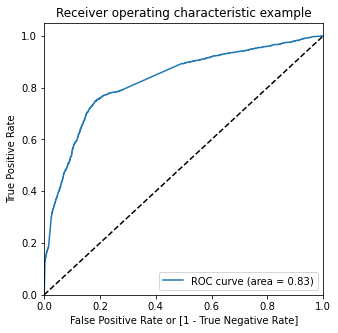

In [91]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

The area under ROC curve is 0.83 which is quite good value which means we have got a good model. Let us also calculate sensitivity and specificity tradeoff to find optimum cutoff value.

In [92]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.169760,0,1,1,0,0,0,0,0,0,0,0
1,0,0.689789,1,1,1,1,1,1,1,1,0,0,0
2,0,0.217848,0,1,1,1,0,0,0,0,0,0,0
3,1,0.610276,1,1,1,1,1,1,1,1,0,0,0
4,1,0.719418,1,1,1,1,1,1,1,1,1,0,0


In [93]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.419147  0.991823  0.060435
0.2   0.2  0.639112  0.901472  0.474776
0.3   0.3  0.786333  0.755519  0.805634
0.4   0.4  0.790899  0.708913  0.842254
0.5   0.5  0.779090  0.629191  0.872983
0.6   0.6  0.761770  0.538430  0.901665
0.7   0.7  0.742403  0.428046  0.939309
0.8   0.8  0.722563  0.331153  0.967734
0.9   0.9  0.667926  0.147997  0.993598


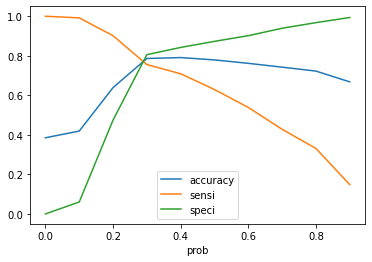

In [94]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

We have 0.32 around we have the optimal cutoff

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.32 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.169760,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.689789,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.217848,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.610276,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.719418,1,1,1,1,1,1,1,1,1,0,0,1


In [96]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7893245158242796

In [97]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion_2

array([[3409,  496],
       [ 907, 1539]], dtype=int64)

In [98]:
# Substituting the value of true positive
TP = confusion_2[1,1]

# Substituting the value of true negatives
TN = confusion_2[0,0]

# Substituting the value of false positives
FP = confusion_2[0,1]

# Substituting the value of false negatives
FN = confusion_2[1,0]

In [99]:
# Calculate Sensitivity

TP/(TP+FN)

0.6291905151267375

In [100]:
# Calculate Specificity

TN/(TN+FP)

0.8729833546734955

Keeping 0.35 as cutoff, we got around 79% of accuracy, sensitivity around 63% and specificity around 87%

## Step 4 : Making Predictions on Test data set

In [101]:
## Scale the test data sets

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [102]:
# Select the columns in X_train for X_test as well

X_test = X_test[X_train_RFE_5.columns]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_bing,What is your current occupation_Working Professional
3271,0.015936,0.070530,0,1,0,0,0,0,0
1490,0.019920,0.679695,1,0,0,0,0,0,1
7936,0.007968,0.033243,0,1,0,0,0,0,0
4216,0.000000,0.000000,0,0,0,0,0,0,0
3830,0.031873,0.073675,0,0,0,1,0,0,0


In [103]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [104]:
y_test_pred[:10]

3271    0.164371
1490    0.973653
7936    0.136457
4216    0.833190
3830    0.149359
1800    0.744297
6507    0.153477
4821    0.269514
4223    0.833190
4714    0.217848
dtype: float64

In [105]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [106]:
# Let's see the head

y_pred_1.head()

,0
3271,0.164371
1490,0.973653
7936,0.136457
4216,0.833190
3830,0.149359


In [107]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [108]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [109]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [110]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.164371
1,1,0.973653
2,0,0.136457
3,1,0.833190
4,0,0.149359


In [111]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [112]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.164371
1,1,0.973653
2,0,0.136457
3,1,0.833190
4,0,0.149359


In [131]:
# Make predictions on the test set using 0.32 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.32 else 0)

In [132]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.164371,0
1,1,0.973653,1
2,0,0.136457,0
3,1,0.833190,1
4,0,0.149359,0


In [133]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7961806830701432

In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1442,  292],
       [ 263,  726]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Calculate sensitivity
TP / float(TP+FN)

0.6744186046511628

In [119]:
# Calculate specificity
TN / float(TN+FP)

0.8552479815455594

### Predicted - Recall View

In [136]:
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.169760,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.689789,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.217848,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.610276,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.719418,1,1,1,1,1,1,1,1,1,0,0,1


In [137]:
## Looking again at the statistics 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3409,  496],
       [ 907, 1539]], dtype=int64)

In [138]:
## Precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7562653562653563

In [139]:
## Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6291905151267375

In [127]:
## Precision - Recall tradeoff

from sklearn.metrics import precision_recall_curve

In [140]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [142]:
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.169760,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.689789,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.217848,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.610276,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.719418,1,1,1,1,1,1,1,1,1,0,0,1


In [143]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

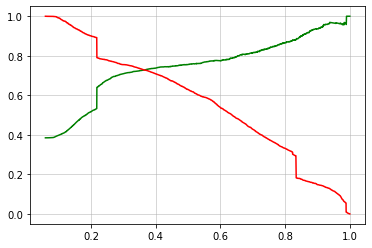

In [151]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid(linewidth = 0.5)
plt.show()

In [153]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.169760,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.689789,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.217848,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.610276,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.719418,1,1,1,1,1,1,1,1,1,0,0,1


In [154]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7921587151629664

In [155]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3267,  638],
       [ 682, 1764]], dtype=int64)

In [156]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
# Calculate Precision

TP/(TP+FP)

0.7343880099916736

In [158]:
# Calculate Recall

TP/(TP+FN)

0.7211774325429272

This cutoff of 0.38 seems to be fine. 

### Predicting on Test data set

In [159]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

3271    0.164371
1490    0.973653
7936    0.136457
4216    0.833190
3830    0.149359
1800    0.744297
6507    0.153477
4821    0.269514
4223    0.833190
4714    0.217848
dtype: float64

In [161]:
## Creating a DataFrame for y_test_pred

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.164371
1490,0.973653
7936,0.136457
4216,0.833190
3830,0.149359


In [163]:
## Creating a DataFrame for y_test

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [164]:
## Remove index for both DataFrame to append them

y_pred_1.reset_index(inplace=True, drop = True)
y_test_df.reset_index(inplace=True, drop=True)

In [166]:
## Creating new DataFrame by appending both the datasets

y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

,Converted,0
0,0,0.164371
1,1,0.973653
2,0,0.136457
3,1,0.833190
4,0,0.149359


In [168]:
## Rename the column 0

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,0,0.164371
1,1,0.973653
2,0,0.136457
3,1,0.833190
4,0,0.149359


Making predictions using 0.38 at the cutoff

In [169]:
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Probability.map(lambda x : 1 if x > 0.38 else 0)
y_pred_final.head()

,Converted,Conversion_Probability,Final_Predicted
0,0,0.164371,0
1,1,0.973653,1
2,0,0.136457,0
3,1,0.833190,1
4,0,0.149359,0


In [170]:
## Checking overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7950789570326845

In [171]:
## Creating confusion matrix again

confusion_final = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion_final

array([[1470,  264],
       [ 294,  695]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
## Calculating Precision

TP/(TP+FP)

0.7343880099916736

In [174]:
# Calculate Recall

TP/(TP+FN)

0.7211774325429272

## Conclusion

- Keeping the cutoff as 0.38, we are getting the Precision as 73% and Recall as 72% 

The most prominent features which can result with increase the X company's positive leads are as follows :

- Total time spent on website : More is the time spent by leads, more leads can be positively converted
- Total Visits : It can result in increasing the prominent leads
- What is your current occupation : Leads from current occupation as Working Professionals can be positive leads
- Leads from following Lead sources can be positive leads :
    - Direct Traffic
    - Google
    - Olark Chat
    - Organic Search
    - Referral Sites
    - bing

#### Keeping the above features in mind, X Company can get the most prominent leads who will mostly end up buying their courses increasing their Lead conversion